In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
%matplotlib inline

plt.rcParams['figure.figsize'] = [11, 4]

In [2]:
# Read in data
data = pd.read_csv('../data/features/merged.csv')

In [3]:
data.columns

Index(['BEAT', 'YEAR', 'COMPLAINTS_POLICE_SHOOTING', 'COMPLAINTS_BLACK',
       'COMPLAINTS_HISPANIC', 'COMPLAINTS_WHITE', 'COMPLAINTS_TOTAL',
       'CRIME_TOTAL', 'CRIME_ARREST', 'CRIME_DOMESTIC', 'ISR_TOTAL_STOPS',
       'ISR_SEARCH', 'ISR_BLACK', 'ISR_WHITE', 'ISR_HISPANIC', 'ISR_ARREST',
       'UOF_TOTAL_COUNT', 'UOF_POLICE_W_WEAPON', 'UOF_POLICE_WO_WEAPON',
       'UOF_HISPANIC', 'UOF_BLACK', 'UOF_WHITE', 'CENSUS_TOTAL POP',
       'CENSUS_WHITE', 'CENSUS_BLACK', 'CENSUS_HISPANIC',
       'CENSUS_MEDIAN INCOME'],
      dtype='object')

In [4]:
# Read in beat boundaries
beats_gdf = gp.read_file('../data/geographies/Boundaries - Police Beats (current).geojson')
beats_gdf.drop(['beat'], axis=1, inplace=True)
beats_gdf.columns = ['BEAT', 'DISTRICT', 'SECTOR', 'geometry']

In [5]:
data.dtypes

BEAT                            int64
YEAR                            int64
COMPLAINTS_POLICE_SHOOTING    float64
COMPLAINTS_BLACK                int64
COMPLAINTS_HISPANIC             int64
COMPLAINTS_WHITE                int64
COMPLAINTS_TOTAL                int64
CRIME_TOTAL                     int64
CRIME_ARREST                    int64
CRIME_DOMESTIC                  int64
ISR_TOTAL_STOPS                 int64
ISR_SEARCH                      int64
ISR_BLACK                     float64
ISR_WHITE                     float64
ISR_HISPANIC                  float64
ISR_ARREST                    float64
UOF_TOTAL_COUNT                 int64
UOF_POLICE_W_WEAPON             int64
UOF_POLICE_WO_WEAPON            int64
UOF_HISPANIC                    int64
UOF_BLACK                       int64
UOF_WHITE                       int64
CENSUS_TOTAL POP              float64
CENSUS_WHITE                  float64
CENSUS_BLACK                  float64
CENSUS_HISPANIC               float64
CENSUS_MEDIA

## Normalize by race

In [6]:
black_cols = ['COMPLAINTS_BLACK', 'ISR_BLACK', 'UOF_BLACK']
white_cols = ['COMPLAINTS_WHITE', 'ISR_WHITE', 'UOF_WHITE']
hisp_cols = ['COMPLAINTS_HISPANIC', 'ISR_HISPANIC', 'UOF_HISPANIC']

In [7]:
for col in black_cols:
    data[col + '_RATE'] = data[col] / data['CENSUS_BLACK']
for col in white_cols:
    data[col + '_RATE'] = data[col] / data['CENSUS_WHITE']
for col in hisp_cols:
    data[col + '_RATE'] = data[col] / data['CENSUS_HISPANIC']

In [8]:
rate_cols = [c for c in data.columns if 'RATE' in c]
data[rate_cols].mean()

COMPLAINTS_BLACK_RATE         16.757093
ISR_BLACK_RATE              1323.674950
UOF_BLACK_RATE                71.588651
COMPLAINTS_WHITE_RATE          3.164444
ISR_WHITE_RATE               327.921942
UOF_WHITE_RATE                 8.316040
COMPLAINTS_HISPANIC_RATE       7.432934
ISR_HISPANIC_RATE            538.371295
UOF_HISPANIC_RATE             16.660393
dtype: float64

In [9]:
training_data = data[data['YEAR']==2019]
data_scaled=training_data.copy()
data_scaled.drop(['BEAT', 'YEAR'], axis=1, inplace=True)

In [10]:
training_data

,BEAT,YEAR,COMPLAINTS_POLICE_SHOOTING,COMPLAINTS_BLACK,COMPLAINTS_HISPANIC,COMPLAINTS_WHITE,COMPLAINTS_TOTAL,CRIME_TOTAL,CRIME_ARREST,CRIME_DOMESTIC,...,CENSUS_MEDIAN INCOME,COMPLAINTS_BLACK_RATE,ISR_BLACK_RATE,UOF_BLACK_RATE,COMPLAINTS_WHITE_RATE,ISR_WHITE_RATE,UOF_WHITE_RATE,COMPLAINTS_HISPANIC_RATE,ISR_HISPANIC_RATE,UOF_HISPANIC_RATE
3,111,2019,0.0,2,0,0,6,2498,603,64,...,98843.500000,51.040921,16971.106153,280.725064,0.0,223.409646,2.741223,0.000000,1251.764824,42.194320
6,112,2019,0.0,3,0,0,5,2169,337,27,...,125252.333333,36.936942,4838.739461,307.807854,0.0,94.699318,1.456913,0.000000,282.194805,0.000000
10,113,2019,0.0,3,0,0,3,1051,206,23,...,121779.000000,28.868548,5465.778380,144.342739,0.0,164.079574,0.000000,0.000000,326.755016,31.621453
14,114,2019,0.0,2,1,0,7,1208,129,35,...,118957.454545,35.005428,3920.607915,140.021711,0.0,205.239484,10.946106,12.162327,1167.583418,97.298618
21,122,2019,0.0,0,0,0,2,1917,158,48,...,110197.000000,0.000000,2453.118335,47.726038,0.0,218.091387,1.664820,0.000000,627.304770,9.801637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2531,2019,0.0,3,0,0,3,690,150,140,...,41339.266667,3.623496,494.003250,36.234957,0.0,261.267410,0.000000,0.000000,326.544812,19.592689
966,2532,2019,0.0,4,0,0,8,1026,219,273,...,42026.200000,5.270590,841.976808,17.129419,0.0,293.367258,0.000000,0.000000,456.354170,8.948121
970,2533,2019,0.0,2,1,0,3,1604,464,193,...,41899.000000,5.075163,1088.622520,63.439541,0.0,164.309155,0.000000,1.779029,450.094339,0.000000
974,2534,2019,0.0,2,3,0,5,1192,250,226,...,42350.444444,12.718398,1430.819781,19.077597,0.0,192.549604,0.000000,3.791349,600.296901,10.110264


In [11]:
from sklearn.preprocessing import StandardScaler
# Normalize columns
# This puts all features at same importance. We may want type or shootings to be more important somehow.
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=data_scaled.columns)

In [12]:
data_scaled.describe()

,COMPLAINTS_POLICE_SHOOTING,COMPLAINTS_BLACK,COMPLAINTS_HISPANIC,COMPLAINTS_WHITE,COMPLAINTS_TOTAL,CRIME_TOTAL,CRIME_ARREST,CRIME_DOMESTIC,ISR_TOTAL_STOPS,ISR_SEARCH,...,CENSUS_MEDIAN INCOME,COMPLAINTS_BLACK_RATE,ISR_BLACK_RATE,UOF_BLACK_RATE,COMPLAINTS_WHITE_RATE,ISR_WHITE_RATE,UOF_WHITE_RATE,COMPLAINTS_HISPANIC_RATE,ISR_HISPANIC_RATE,UOF_HISPANIC_RATE
count,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,2.808469e-17,5.616939e-17,5.616939e-17,-4.212704e-17,4.212704e-17,1.123388e-16,-5.616939e-17,8.425408e-17,8.425408e-17,5.616939e-17,...,3.089316e-16,3.510587e-17,8.074349e-17,2.808469e-17,-2.106352e-17,2.808469e-17,1.579764e-17,-7.021173e-18,1.404235e-17,2.808469e-17
std,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,...,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00,1.001982e+00
min,-2.308439e-01,-8.515164e-01,-6.512598e-01,-4.727957e-01,-1.159431e+00,-1.694918e+00,-1.179087e+00,-1.589836e+00,-1.342622e+00,-1.137356e+00,...,-1.343407e+00,-5.053065e-01,-5.996693e-01,-4.907940e-01,-2.435371e-01,-5.058473e-01,-2.737478e-01,-2.198314e-01,-6.175700e-01,-5.090449e-01
25%,-2.308439e-01,-6.586483e-01,-6.512598e-01,-4.727957e-01,-6.658763e-01,-6.815775e-01,-6.600125e-01,-7.733918e-01,-6.999251e-01,-7.173544e-01,...,-7.514251e-01,-4.426557e-01,-4.327033e-01,-3.900023e-01,-2.435371e-01,-4.142066e-01,-2.737478e-01,-2.198314e-01,-4.005912e-01,-5.090449e-01
50%,-2.308439e-01,-2.729122e-01,-6.512598e-01,-4.727957e-01,-3.368398e-01,-2.014474e-01,-2.386463e-01,-1.202362e-01,-2.391239e-01,-3.073529e-01,...,-3.121236e-01,-2.630142e-01,-3.003870e-01,-2.812890e-01,-2.435371e-01,-3.176524e-01,-2.737478e-01,-2.198314e-01,-2.498759e-01,-3.471839e-01
75%,-2.308439e-01,4.985602e-01,2.641220e-01,6.773707e-01,4.857516e-01,4.379220e-01,3.109618e-01,6.769978e-01,5.127096e-01,4.726500e-01,...,4.843151e-01,-5.864597e-02,-3.128321e-02,-4.243946e-02,-1.354170e-01,-1.283571e-01,-1.604777e-01,-1.150440e-01,5.591326e-02,6.366066e-02
max,7.069596e+00,6.863207e+00,5.756413e+00,6.428202e+00,7.066482e+00,5.748307e+00,7.138316e+00,3.817908e+00,5.491788e+00,5.302668e+00,...,2.897557e+00,7.137500e+00,7.579010e+00,8.514834e+00,8.401647e+00,6.005428e+00,8.728977e+00,1.428638e+01,1.134633e+01,6.604822e+00


### PCA

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
def scree_plot(pca_obj):
    """
    Create scree plot for PCA. 
    :param pca_obj: sklearn.decomposition.PCA object
    :return:
    """
    sns.lineplot(x=range(1, pca_obj.n_components+1), y=pca_obj.explained_variance_ratio_)
    plt.xlabel("Principal component number")
    plt.ylabel("Variance explained")
    plt.title("Scree plot for PCA")

In [14]:
pca = PCA(n_components=20)

In [15]:
pca.fit(data_scaled.values)

PCA(n_components=20)

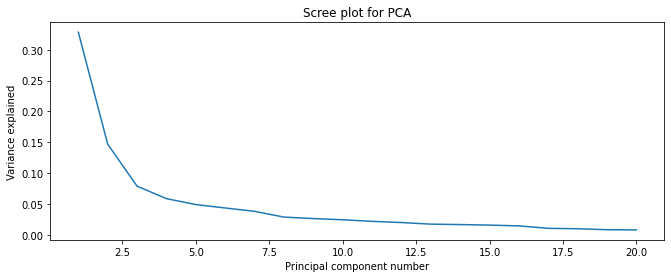

In [16]:
scree_plot(pca)

In [17]:
data_pc = pd.DataFrame(pca.transform(data_scaled))
data_pc.columns = ['C'+str(i) for i in np.arange(1, pca.n_components_+1)]


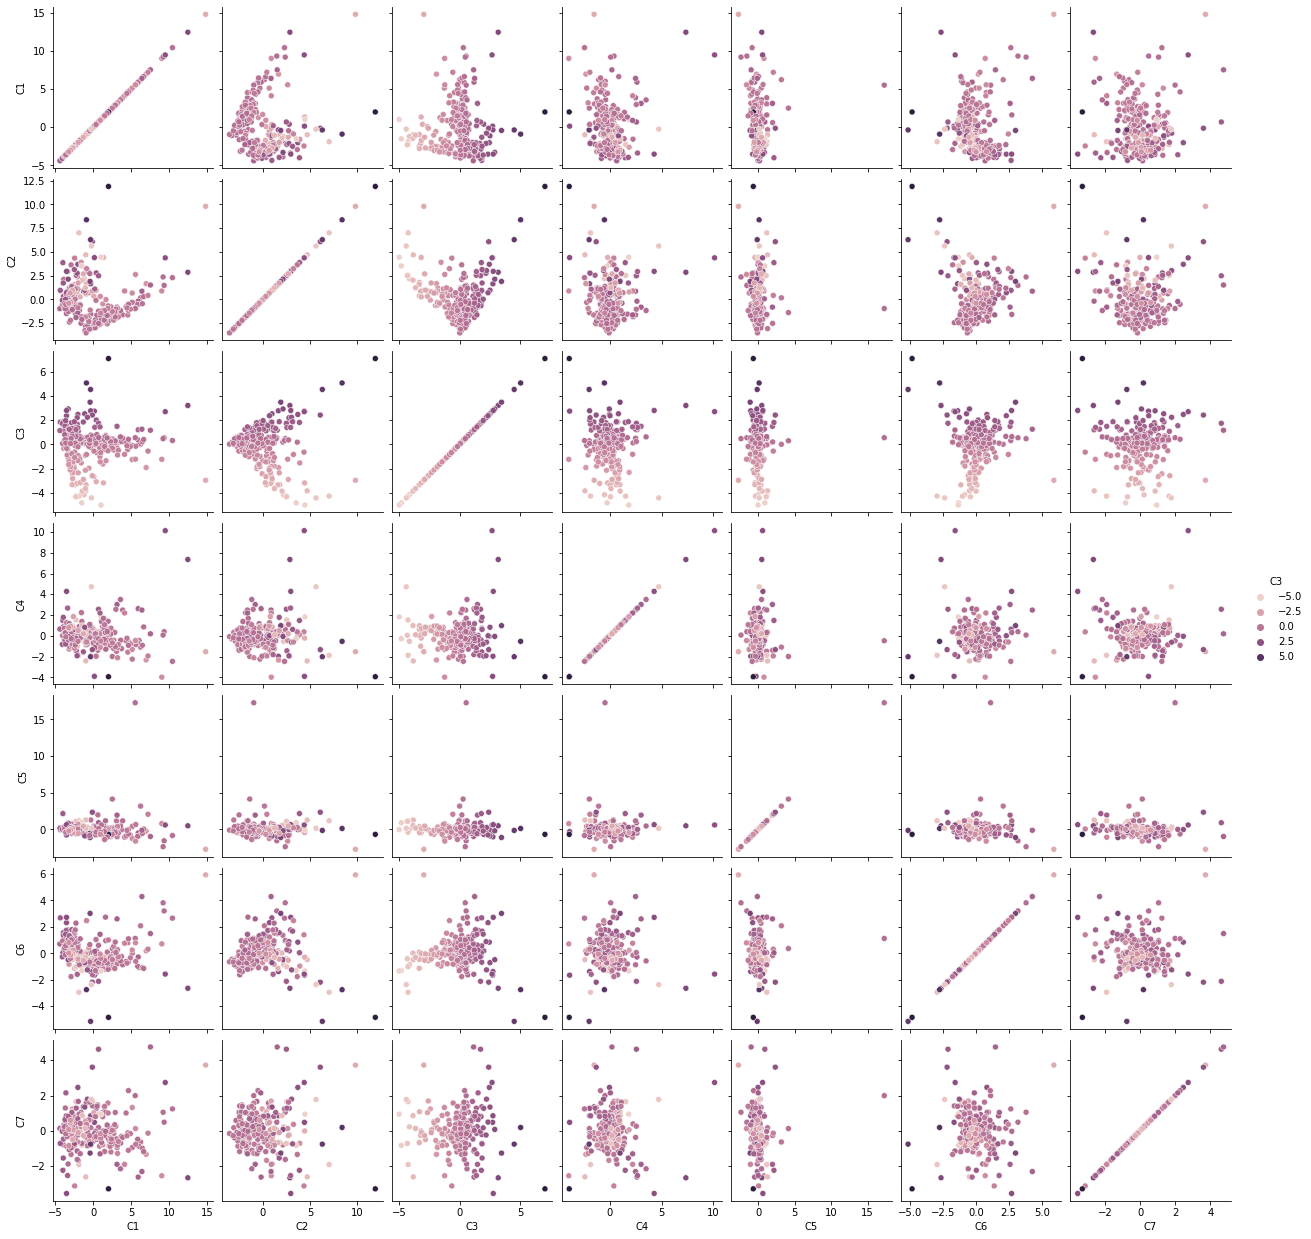

In [18]:
data_pc.columns = ['C'+str(i) for i in np.arange(1,pca.n_components_+1)]
sns.pairplot(data = data_pc, vars=['C1','C2','C3','C4','C5','C6','C7'], hue='C3', diag_kind=None)

## Compare clusters for different datasets

In [19]:
data_scaled.columns

Index(['COMPLAINTS_POLICE_SHOOTING', 'COMPLAINTS_BLACK', 'COMPLAINTS_HISPANIC',
       'COMPLAINTS_WHITE', 'COMPLAINTS_TOTAL', 'CRIME_TOTAL', 'CRIME_ARREST',
       'CRIME_DOMESTIC', 'ISR_TOTAL_STOPS', 'ISR_SEARCH', 'ISR_BLACK',
       'ISR_WHITE', 'ISR_HISPANIC', 'ISR_ARREST', 'UOF_TOTAL_COUNT',
       'UOF_POLICE_W_WEAPON', 'UOF_POLICE_WO_WEAPON', 'UOF_HISPANIC',
       'UOF_BLACK', 'UOF_WHITE', 'CENSUS_TOTAL POP', 'CENSUS_WHITE',
       'CENSUS_BLACK', 'CENSUS_HISPANIC', 'CENSUS_MEDIAN INCOME',
       'COMPLAINTS_BLACK_RATE', 'ISR_BLACK_RATE', 'UOF_BLACK_RATE',
       'COMPLAINTS_WHITE_RATE', 'ISR_WHITE_RATE', 'UOF_WHITE_RATE',
       'COMPLAINTS_HISPANIC_RATE', 'ISR_HISPANIC_RATE', 'UOF_HISPANIC_RATE'],
      dtype='object')

In [20]:
beats_gdf['BEAT'] = beats_gdf['BEAT'].astype(int)

In [21]:
from sklearn.cluster import DBSCAN
def cluster_by_cols(col_list):
    for d in col_list:
        cols = [c for c in data_scaled.columns if d in c]
        final_df = data_scaled[cols]
        for ep in [0.25]:
            cluster = DBSCAN(eps=ep, min_samples=5)
            cluster.fit(final_df.values)
            cluster_df = pd.DataFrame({'BEAT':training_data['BEAT'], 'cluster': cluster.labels_})
            cluster_df['cluster'] = cluster_df['cluster'].astype(str)
            cluster_gdf = beats_gdf.merge(cluster_df, on='BEAT')
            cluster_gdf.plot(column='cluster', legend=True)
            plt.title(f'{d}, EPS: {ep}')
            plt.xticks([])
            plt.yticks([])

## Cluster by different datasets

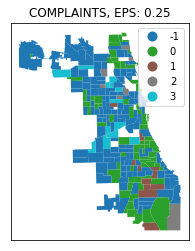

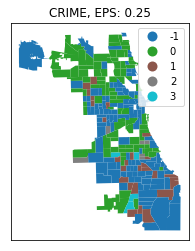

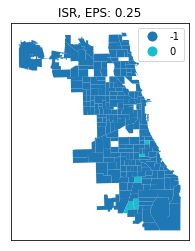

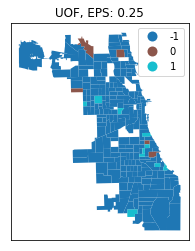

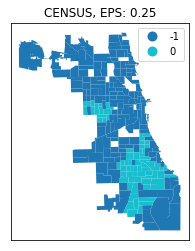

In [22]:
col_list = ['COMPLAINTS', 'CRIME', 'ISR', 'UOF', 'CENSUS']
cluster_by_cols(col_list)

## Cluster by demographics

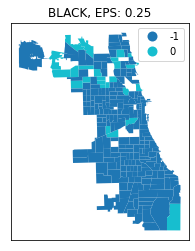

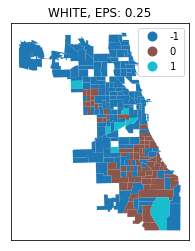

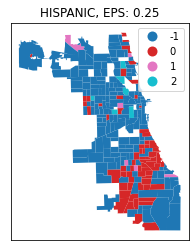

In [23]:
col_list =  ['BLACK', 'WHITE', 'HISPANIC']
cluster_by_cols(col_list)

## Similarity

In [41]:
def get_match_mat(labels):
    # create list of lists, where each sublist is list of bools if there is a match
    final_list = [] 
    for a in labels:
        col_list = []
        for b in labels:
            col_list.append(a==b & a>-1) # Adding >-1 to not include noise in DBSCAN
        final_list.append(col_list)
    return np.array(final_list)

In [42]:
def get_pct_match(mat1, mat2, n):
    total_matches = np.sum(mat1 & mat2)
    # remove diagonal matches, and divide by two to only count a match once (matrix is symmetric)
    actual_matches = (total_matches - n) / 2
    max_matches = max(((np.sum(mat1) - n )/2), ((np.sum(mat2) - n) /2))
    percent_match = actual_matches / max_matches
    return percent_match

In [43]:
def get_sim_clusters(labels1, labels2):
    n = len(labels1)
    mat1 = get_match_mat(labels1)
    mat2 = get_match_mat(labels2)
    return get_pct_match(mat1, mat2, n)

In [52]:
def get_cluster_labels(col_string):
    cols = [c for c in data_scaled.columns if col_string in c]
    # Remove demographics
    for d in ['BLACK', 'WHITE', 'HISPANIC']:
        cols = [c for c in cols if d not in c]
    final_df = data_scaled[cols]
    cluster = DBSCAN(eps=0.25, min_samples=5)
    cluster.fit(final_df.values)
    return cluster.labels_

In [53]:
label_list = ['CRIME', 'UOF', 'COMPLAINT', 'ISR', 'CENSUS']
results_df = pd.DataFrame()
for i, a in enumerate(label_list):
    labels_a = get_cluster_labels(a)
    for b in label_list[i+1:]:
        labels_b = get_cluster_labels(b)
        print(a, b, get_sim_clusters(labels_a, labels_b))

CRIME UOF 0.49982776438167414
CRIME COMPLAINT 0.46357749558489614
CRIME ISR 0.5840426101386436
CRIME CENSUS 0.43724535194117925
UOF COMPLAINT 0.42541417879068205
UOF ISR 0.4936298913334404
UOF CENSUS 0.37797967498712126
COMPLAINT ISR 0.6028761248002691
COMPLAINT CENSUS 0.6641325372130182
ISR CENSUS 0.5063222966327916
